## Evolución del IPC en España

Últimos "n" datos publicados para la serie que recoge la variación mensual del Índice de precios de consumo. Base 2016.

In [1]:
import pandas as pd
import urllib3
import json

In [2]:
n_meses = '12'
url = "http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/IPC206449?nult=" + n_meses
#print(url)

In [3]:
http = urllib3.PoolManager()
r = http.request('GET', url)
r.status
response = r.data

datos_json = json.loads(response)

In [4]:
anyos = []
codificacion_meses = {1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio', 7:'Julio', 8: 'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'}
meses = []
valor = []

In [5]:
for i in range(int(n_meses)):
    anyos.append(datos_json['Data'][i]['Anyo'])
    valor.append(datos_json['Data'][i]['Valor'])
    mes = int(datos_json['Data'][i]['FK_Periodo'])
    meses.append(codificacion_meses.get(mes))
anyos
valor

[-0.4, -1.3, 0.2, 0.4, 1.0, 0.2, -0.1, -0.6, -0.1, 0.0, 1.0, 0.2]

In [6]:
dic = dict(zip(meses,valor))

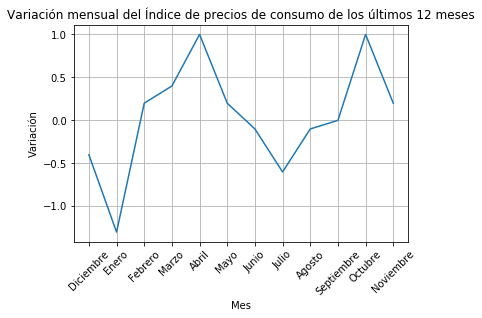

In [8]:
import matplotlib
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
ax.plot(meses, valor)

ax.set(xlabel='Mes', ylabel='Variación',
       title='Variación mensual del Índice de precios de consumo de los últimos ' + n_meses + ' meses')
plt.xticks(rotation = 45)
ax.grid()

#fig.savefig("test.png")
plt.show()